In [1]:
#import libraries
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
#load data
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')
gender_submission = pd.read_csv ('gender_submission.csv')

In [8]:
#Menampilkan 10 data pertama
train_data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [9]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [10]:
column_names = train_data.columns
for column in column_names :
    print(column + '-' + str(train_data[column].isnull().sum()))

PassengerId-0
Survived-0
Pclass-0
Name-0
Sex-0
Age-177
SibSp-0
Parch-0
Ticket-0
Fare-0
Cabin-687
Embarked-2


In [12]:
train_data['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

Text(0, 0.5, 'Jumlah Penumpang')

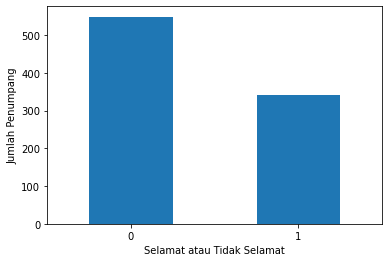

In [13]:
dt = train_data['Survived'].value_counts()
plt = dt.plot(kind = 'bar', rot=0)
plt.set_xlabel('Selamat atau Tidak Selamat')
plt.set_ylabel('Jumlah Penumpang')

Text(0, 0.5, 'Probabilitas Selamat')

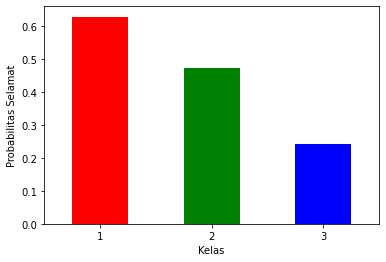

In [14]:
dt = train_data[['Pclass', 'Survived']].groupby(
    'Pclass').mean().Survived
plt = dt.plot(kind = 'bar', rot = 0, color = ['red', 'green', 'blue'])
plt.set_xlabel('Kelas')
plt.set_ylabel('Probabilitas Selamat')

C:\Users\lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


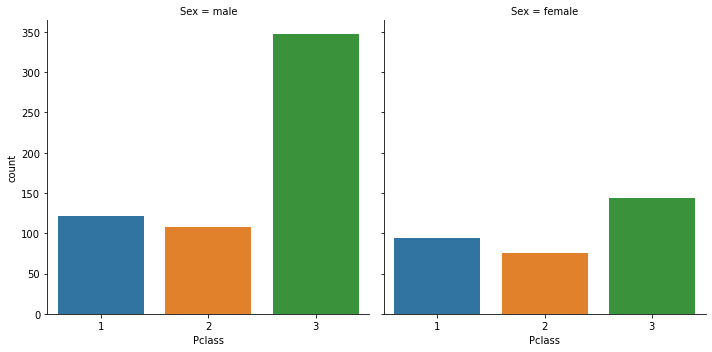

In [16]:
sns.catplot('Pclass', col = 'Sex', data = train_data, kind= 'count')

In [17]:
train_data = train_data.drop(columns = ['Ticket', 'PassengerId', 'Cabin'])
train_data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


In [19]:
train_data['FamilySize'] = train_data['SibSp'] + train_data['Parch'] + 1
train_data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,2
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,2
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,1
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,2
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1


In [20]:
train_data['Sex'] = train_data['Sex'].map({'male':0, 'female':1})
train_data['Embarked'] = train_data['Embarked'].map({'C':0, 'Q':1, 'S':2})
train_data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize
0,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,7.2500,2.0,2
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,71.2833,0.0,2
2,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,7.9250,2.0,1
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,53.1000,2.0,2
4,0,3,"Allen, Mr. William Henry",0,35.0,0,0,8.0500,2.0,1


In [21]:
train_data['Title'] = train_data['Name'].str.extract(
    '([A-Za-z]+)\.', expand = False)
train_data = train_data.drop(columns = 'Name')
train_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,Title
0,0,3,0,22.0,1,0,7.2500,2.0,2,Mr
1,1,1,1,38.0,1,0,71.2833,0.0,2,Mrs
2,1,3,1,26.0,0,0,7.9250,2.0,1,Miss
3,1,1,1,35.0,1,0,53.1000,2.0,2,Mrs
4,0,3,0,35.0,0,0,8.0500,2.0,1,Mr


<AxesSubplot:>

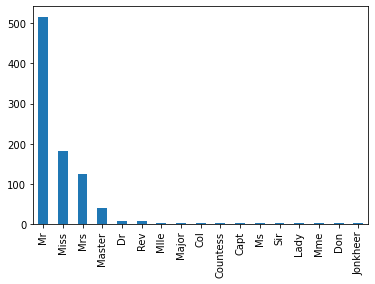

In [22]:
train_data['Title'].value_counts().plot(kind= 'bar')

Text(0, 0.5, 'Jumlah Penumpang')

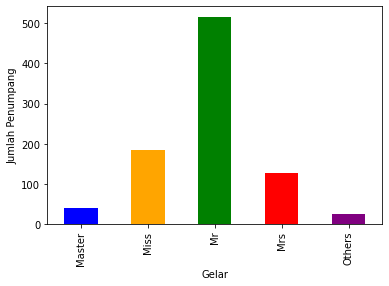

In [25]:
train_data['Title'] = train_data['Title'].replace(
    ['Dr', 'Rev', 'Col', 'Major', 'Countess', 'Sir', 'Jonkheer', 'Lady', 'Capt', 'Don'], 'Others')
train_data['Title'] = train_data['Title'].replace('Ms', 'Miss')
train_data['Title'] = train_data['Title'].replace('Mme', 'Mrs')
train_data['Title'] = train_data['Title'].replace('Mlle', 'Miss')

plt = train_data['Title'].value_counts().sort_index().plot(
    kind= 'bar', color = ['blue', 'orange', 'green', 'red', 'purple'])
plt.set_xlabel('Gelar')
plt.set_ylabel('Jumlah Penumpang')

In [26]:
corr_matrix = train_data.corr()

<AxesSubplot:>

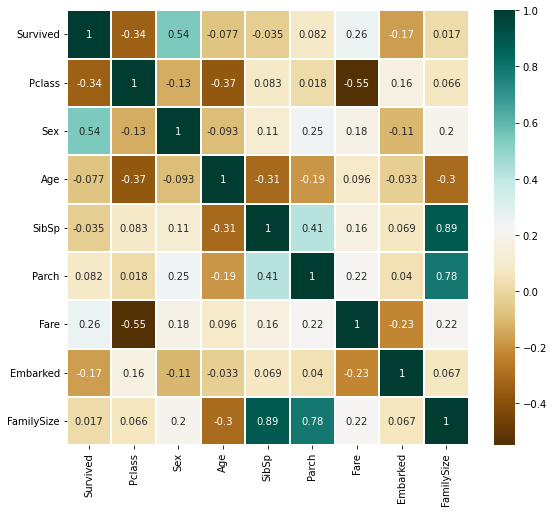

In [27]:
import matplotlib.pyplot as plt

plt.figure(figsize=(9, 8))
sns.heatmap(data = corr_matrix, cmap='BrBG', annot=True, linewidths =0.2)

In [28]:
missing = train_data['Embarked'].isnull().sum()
print("Jumlah data kosong pada atribut Embarked: ", missing)

Jumlah data kosong pada atribut Embarked:  2


Text(0, 0.5, 'Jumlah penumpang')

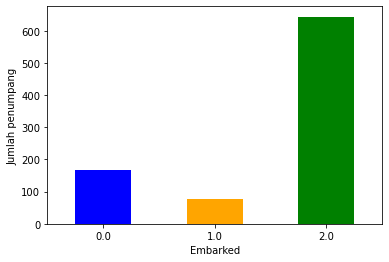

In [29]:
plt = train_data['Embarked'].value_counts().sort_index().plot(
    kind= 'bar', color = ['blue', 'orange', 'green'], rot = 0)
plt.set_xlabel('Embarked')
plt.set_ylabel('Jumlah penumpang')

In [30]:
train_data['Embarked'] = train_data['Embarked'].fillna(2)
train_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,Title
0,0,3,0,22.0,1,0,7.2500,2.0,2,Mr
1,1,1,1,38.0,1,0,71.2833,0.0,2,Mrs
2,1,3,1,26.0,0,0,7.9250,2.0,1,Miss
3,1,1,1,35.0,1,0,53.1000,2.0,2,Mrs
4,0,3,0,35.0,0,0,8.0500,2.0,1,Mr


In [32]:
NaN_indexes = train_data['Age'][train_data['Age'].isnull()].index
print(NaN_indexes)

Int64Index([  5,  17,  19,  26,  28,  29,  31,  32,  36,  42,
            ...
            832, 837, 839, 846, 849, 859, 863, 868, 878, 888],
           dtype='int64', length=177)


In [34]:
for i in NaN_indexes :
    pred_age = train_data['Age'][((train_data.SibSp == train_data.iloc[i]["SibSp"]) &
                                  (train_data.Parch == train_data.iloc[i]["Parch"]) &
                                  (train_data.Pclass == train_data.iloc[i]["Pclass"])
                                  )].median()
    if np.isnan(pred_age):
        train_data['Age'].iloc[i] = train_data['Age'].median()
    else :
        train_data['Age'].iloc[i] = pred_age

C:\Users\lenovo\AppData\Local\Temp\ipykernel_1676\655499305.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['Age'].iloc[i] = pred_age
C:\Users\lenovo\AppData\Local\Temp\ipykernel_1676\655499305.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['Age'].iloc[i] = train_data['Age'].median()


In [35]:
train_data.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age           0
SibSp         0
Parch         0
Fare          0
Embarked      0
FamilySize    0
Title         0
dtype: int64

In [36]:
train_data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,Title
0,0,3,0,22.0,1,0,7.2500,2.0,2,Mr
1,1,1,1,38.0,1,0,71.2833,0.0,2,Mrs
2,1,3,1,26.0,0,0,7.9250,2.0,1,Miss
3,1,1,1,35.0,1,0,53.1000,2.0,2,Mrs
4,0,3,0,35.0,0,0,8.0500,2.0,1,Mr
...,...,...,...,...,...,...,...,...,...,...
886,0,2,0,27.0,0,0,13.0000,2.0,1,Others
887,1,1,1,19.0,0,0,30.0000,2.0,1,Miss
888,0,3,1,13.5,1,2,23.4500,2.0,4,Miss
889,1,1,0,26.0,0,0,30.0000,0.0,1,Mr
